In [37]:
import pandas as pd
import numpy as np

salary_data = pd.read_csv("Salary_Data.csv")
print(salary_data.shape)

(6704, 6)


In [38]:
print(salary_data.head)

<bound method NDFrame.head of        Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4          

In [39]:
salary_data["GenderCode"] = np.where(salary_data["Gender"] == "Female", 1, 0)
print(salary_data.head)

<bound method NDFrame.head of        Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  GenderCode  
0                     5.0   90000.0           0  
1                     3.0   65000.0           1  
2                    15.0  150000.0           0  
3

In [40]:
class_mapping = {
    "High School":1,
    "Bachelor's":2,
    "Master's":3,
    "Bachelor's Degree":4,
    "PhD":5,
}
salary_data["level"] = salary_data["Education Level"].map(class_mapping)
print(salary_data.head)


<bound method NDFrame.head of        Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  GenderCode  level  
0                     5.0   90000.0           0    2.0  
1                     3.0   65000.0           1    3.0  
2                    15.0  150

In [41]:
print(salary_data.describe())

               Age  Years of Experience         Salary   GenderCode  \
count  6702.000000          6701.000000    6699.000000  6704.000000   
mean     33.620859             8.094687  115326.964771     0.449582   
std       7.614633             6.059003   52786.183911     0.497489   
min      21.000000             0.000000     350.000000     0.000000   
25%      28.000000             3.000000   70000.000000     0.000000   
50%      32.000000             7.000000  115000.000000     0.000000   
75%      38.000000            12.000000  160000.000000     1.000000   
max      62.000000            34.000000  250000.000000     1.000000   

             level  
count  5127.000000  
mean      3.653599  
std       1.256803  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       5.000000  
max       5.000000  


In [42]:
print(salary_data.isnull().sum())
print(sum(salary_data["Age"].isnull()))

Age                       2
Gender                    2
Education Level           3
Job Title                 2
Years of Experience       3
Salary                    5
GenderCode                0
level                  1577
dtype: int64
2


In [43]:
avg_age = salary_data["Age"].mean()
salary_data["Age"].fillna(avg_age,inplace=True)
print(sum(salary_data["Age"].isnull()))

Education_avg = salary_data["level"].mean()
salary_data["Education Level"].fillna(Education_avg,inplace=True)
print(sum(salary_data["Education Level"].isnull()))

salary_data = salary_data.dropna(subset=['Job Title'])
print(sum(salary_data['Job Title'].isnull()))
print(salary_data.isnull().sum())


0
0
0
Age                       0
Gender                    0
Education Level           0
Job Title                 0
Years of Experience       1
Salary                    3
GenderCode                0
level                  1575
dtype: int64


<Axes: xlabel='education level', ylabel='Salary'>

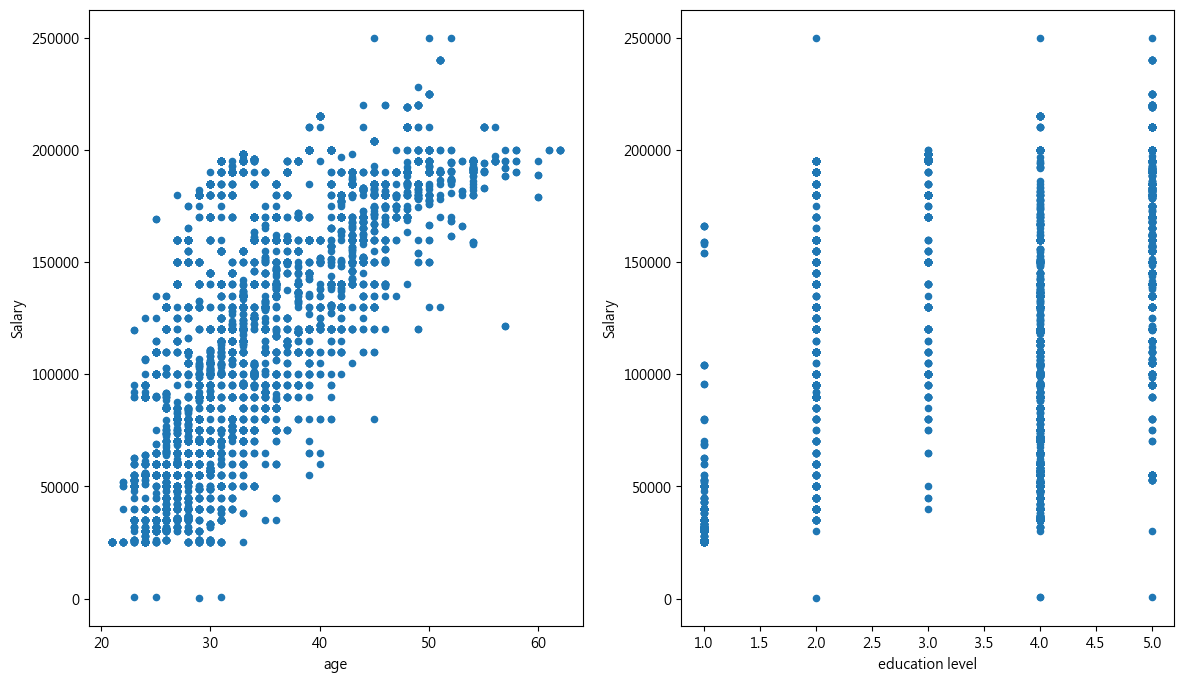

In [44]:
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

fig,axes = plt.subplots(nrows = 1,ncols=2,figsize = (14,8))

df = pd.DataFrame({"age":salary_data["Age"],"Salary":salary_data["Salary"]})
df.plot(kind="scatter",x="age",y="Salary",ax=axes[0])


df1 = pd.DataFrame({"education level":salary_data["level"],"Salary":salary_data["Salary"]})
df1.plot(kind="scatter",x="education level",y="Salary",ax=axes[1])


Text(0.5, 1.0, 'Outliers of education level and Salary')

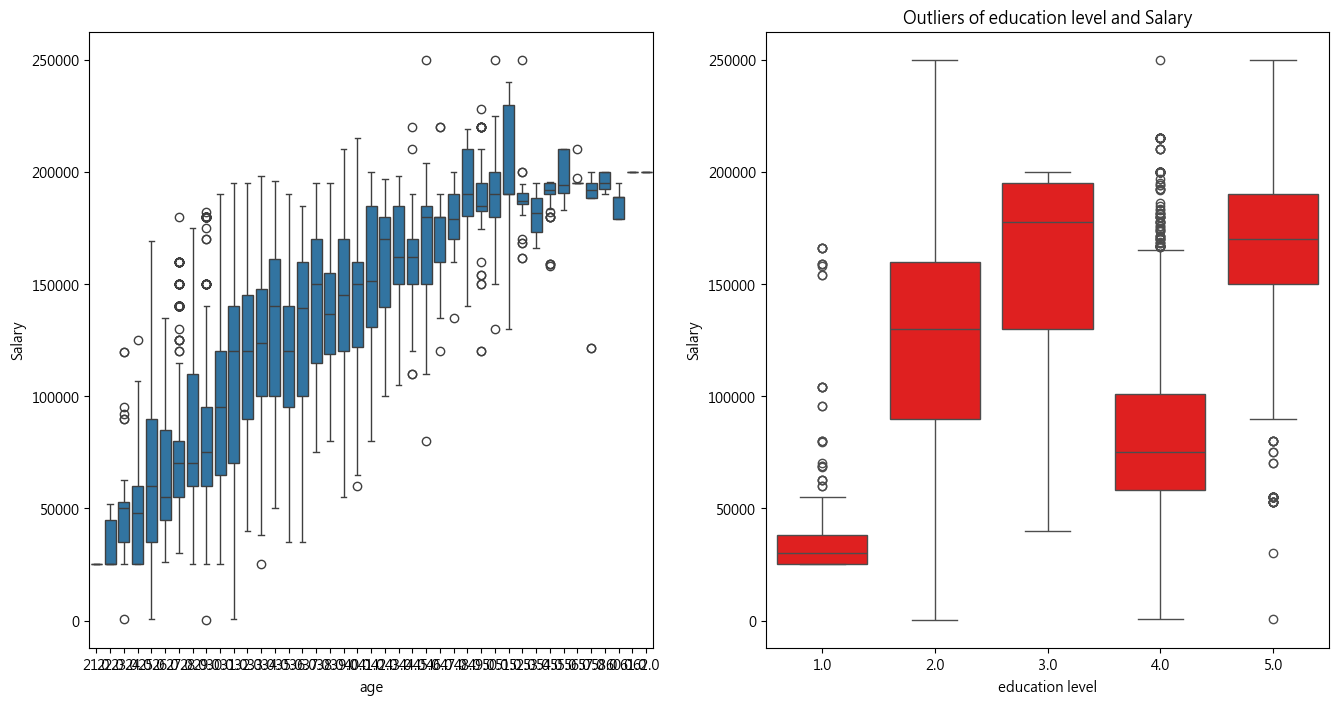

In [45]:
import seaborn as sns

fig,axes = plt.subplots(nrows = 1,ncols=2,figsize = (16,8))

sns.boxplot(x="age",y="Salary",data= df,ax=axes[0])
plt.title('Outliers of education level and Salary')

sns.boxplot(x = 'education level', y = 'Salary', data = df1, color='red' ,ax=axes[1])
plt.title('Outliers of education level and Salary')

In [46]:
Years_of_Experience_avg= salary_data["Years of Experience"].mean()
salary_data["Years of Experience"].fillna(Years_of_Experience_avg,inplace=True)

Salary_avg = salary_data["Salary"].mean()
salary_data["Salary"].fillna(Salary_avg,inplace=True)

salary_data = salary_data.dropna(subset=['level'])
print(salary_data.isnull().sum())


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
GenderCode             0
level                  0
dtype: int64


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

salary_job = salary_data.filter(['Salary','Job Title'])
job = salary_job.groupby('Job Title').mean()
job = job.sort_values(by="Salary",ascending=False)
top_5_jobs = job.head(5).index.tolist()

top_5_jobs


['CEO',
 'Chief Technology Officer',
 'Chief Data Officer',
 'Director of Data Science',
 'VP of Finance']

In [48]:
jobname=[]

for x in range(1,6,1):
    for y in range(0,5,1):
        if x == 3 and y == 0:
            continue    
        if x == 5 and y == 3:
            continue 
        data = salary_data[(salary_data["level"] == x) & (salary_data["Years of Experience"] == y) ]
        jobdata = data["Job Title"].value_counts().idxmax()
        jobname.append(jobdata)
        print('level',x,'years',y,jobdata )
print(jobname)

level 1 years 0 Receptionist
level 1 years 1 Junior Sales Associate
level 1 years 2 Junior Sales Associate
level 1 years 3 Sales Associate
level 1 years 4 Back end Developer
level 2 years 0 Data Entry Clerk
level 2 years 1 Data Analyst
level 2 years 2 Data Analyst
level 2 years 3 Data Analyst
level 2 years 4 Software Engineer
level 3 years 1 Data Analyst
level 3 years 2 Product Manager
level 3 years 3 Product Manager
level 3 years 4 Data Scientist
level 4 years 0 Senior Project Engineer
level 4 years 1 Product Manager
level 4 years 2 Front end Developer
level 4 years 3 Software Engineer
level 4 years 4 Software Engineer
level 5 years 0 Software Engineer Manager
level 5 years 1 Software Engineer Manager
level 5 years 2 Data Scientist
level 5 years 4 Marketing Manager
['Receptionist', 'Junior Sales Associate', 'Junior Sales Associate', 'Sales Associate', 'Back end Developer', 'Data Entry Clerk', 'Data Analyst', 'Data Analyst', 'Data Analyst', 'Software Engineer', 'Data Analyst', 'Product

In [49]:
Group_by_Education = salary_data.groupby('level')
def Select_top_5_years(salary_data):
    return salary_data.loc[salary_data['Years of Experience'].isin([1,2,3,4,5]),['Job Title','Salary','Age','Years of Experience','Education Level']]
Group_by_Experience = Group_by_Education.apply(Select_top_5_years)

Group_by_Experience[Group_by_Experience['Job Title'].isin(jobname)]
Group_by_Experience

Job Title   Salary   Age  Years of Experience  \
level                                                                     
1.0   2385      Full Stack Engineer  69032.0  25.0                  2.0   
      2411  Senior Project Engineer  52731.0  24.0                  1.0   
      2454      Front end Developer  62852.0  23.0                  2.0   
      2465      Full Stack Engineer  69032.0  25.0                  2.0   
      2491  Senior Project Engineer  52731.0  24.0                  1.0   
...                             ...      ...   ...                  ...   
5.0   6640     Sales Representative  55000.0  28.0                  4.0   
      6654        Marketing Manager  55000.0  28.0                  4.0   
      6668     Sales Representative  55000.0  28.0                  4.0   
      6682        Marketing Manager  55000.0  28.0                  4.0   
      6696     Sales Representative  55000.0  28.0                  4.0   

           Education Level  
level                       
1.0   2385     High School  
      2411     High School  
      2454     High School  
      2465     High School  
      2491     High School  
...                    ...  
5.0   6640             PhD  
      6654             PhD  
      6668             PhD  
      6682             PhD  
      6696             PhD  

[2356 rows x 5 columns]

In [50]:
Group_by_Experience.to_csv('Group_by_Experience')
ExperienceCSV = pd.read_csv('Group_by_Experience')
ExperienceCSV

,level,Unnamed: 1,Job Title,Salary,Age,Years of Experience,Education Level
0,1.0,2385,Full Stack Engineer,69032.0,25.0,2.0,High School
1,1.0,2411,Senior Project Engineer,52731.0,24.0,1.0,High School
2,1.0,2454,Front end Developer,62852.0,23.0,2.0,High School
3,1.0,2465,Full Stack Engineer,69032.0,25.0,2.0,High School
4,1.0,2491,Senior Project Engineer,52731.0,24.0,1.0,High School
...,...,...,...,...,...,...,...
2351,5.0,6640,Sales Representative,55000.0,28.0,4.0,PhD
2352,5.0,6654,Marketing Manager,55000.0,28.0,4.0,PhD
2353,5.0,6668,Sales Representative,55000.0,28.0,4.0,PhD
2354,5.0,6682,Marketing Manager,55000.0,28.0,4.0,PhD


Text(0.5, 1.0, '工作與薪水')

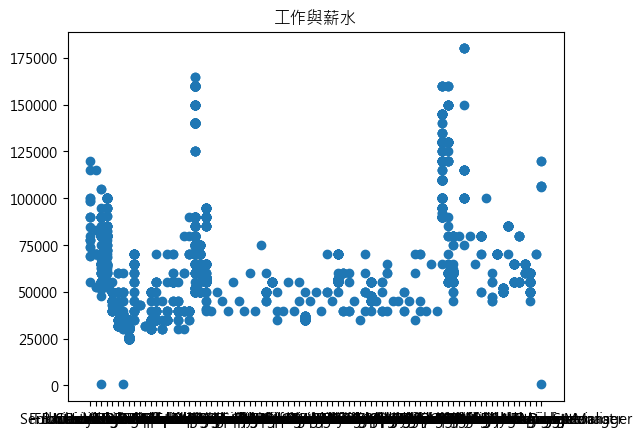

In [51]:
plt.scatter(ExperienceCSV['Job Title'], ExperienceCSV['Salary'])
plt.title("工作與薪水")

Text(0.5, 1.0, '教育程度與薪水')

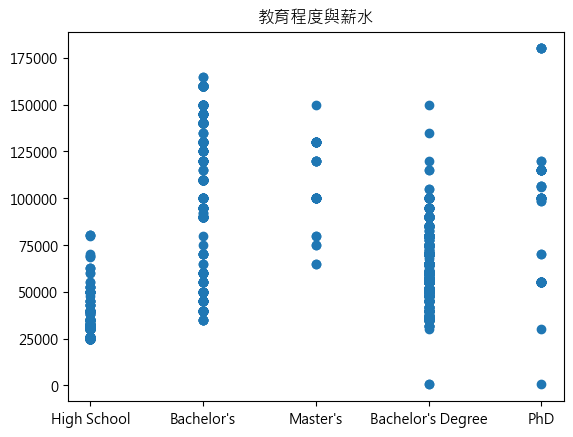

In [52]:
plt.scatter(ExperienceCSV['Education Level'], ExperienceCSV['Salary'])
plt.title("教育程度與薪水")

Text(0.5, 1.0, '經驗與薪水')

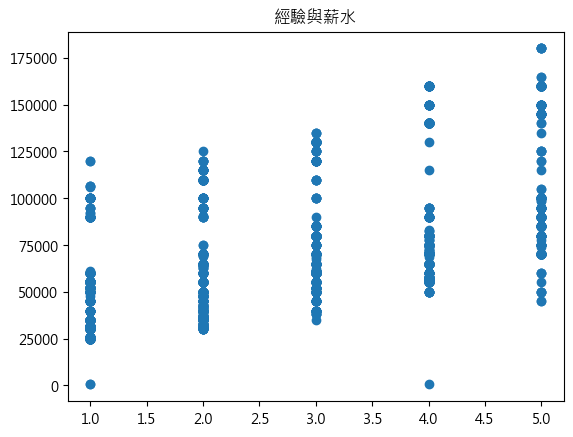

In [53]:
plt.scatter(ExperienceCSV['Years of Experience'], ExperienceCSV['Salary'])
plt.title("經驗與薪水")

In [54]:
feature_names = ['Age', 'Years of Experience', 'GenderCode','level']

In [55]:
X1 = pd.DataFrame(salary_data, columns=feature_names)
X1

,Age,Years of Experience,GenderCode,level
0,32.0,5.0,0,2.0
1,28.0,3.0,1,3.0
2,45.0,15.0,0,5.0
3,36.0,7.0,1,2.0
4,52.0,20.0,0,3.0
...,...,...,...,...
6698,37.0,6.0,0,4.0
6699,49.0,20.0,1,5.0
6700,32.0,3.0,0,1.0
6701,30.0,4.0,1,4.0


In [56]:
target = pd.DataFrame(salary_data, columns=["Salary"])
target

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
6698,75000.0
6699,200000.0
6700,50000.0
6701,55000.0


In [57]:
Y = target["Salary"]
Y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6698     75000.0
6699    200000.0
6700     50000.0
6701     55000.0
6703     35000.0
Name: Salary, Length: 5127, dtype: float64

In [58]:
lm = LinearRegression()
lm

LinearRegression()

In [59]:
XTrain, XTest, yTrain, yTest = train_test_split(X1, Y, test_size=0.33,
                                                random_state=4)
XTrain

,Age,Years of Experience,GenderCode,level
5780,26.0,2.0,0,4.0
333,33.0,4.0,0,2.0
5747,31.0,8.0,1,5.0
1333,43.0,13.0,0,5.0
970,27.0,4.0,1,2.0
...,...,...,...,...
4899,25.0,3.0,1,4.0
711,25.0,2.0,1,2.0
3253,30.0,5.0,1,4.0
175,35.0,7.0,0,2.0


In [60]:
lm.fit(XTrain, yTrain)
pred_test = lm.predict(XTest)
pred_test


array([ 80638.48004753, 203219.24553767,  93176.58003013, ...,
       102935.76267905,  76322.01139287,  95787.7766168 ])

In [61]:
print("迴歸係數:", lm.coef_)
print("截距:", lm.intercept_ )

迴歸係數: [-2503.3565961  10024.08488544 -4316.46865466  1548.20982205]
截距: 114467.37079368623


In [62]:
coef = pd.DataFrame(feature_names, columns=["features"])
coef

,features
0,Age
1,Years of Experience
2,GenderCode
3,level


In [63]:
coef["estimatedCoefficients"] = lm.coef_
print(coef)

              features  estimatedCoefficients
0                  Age           -2503.356596
1  Years of Experience           10024.084885
2           GenderCode           -4316.468655
3                level            1548.209822


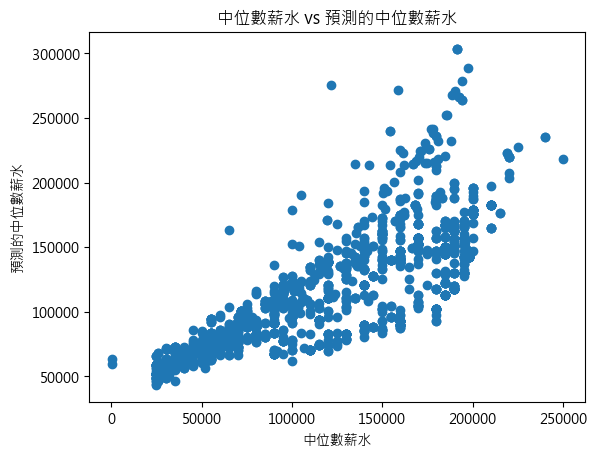

In [64]:
plt.scatter(yTest, pred_test)
plt.xlabel("中位數薪水")
plt.ylabel("預測的中位數薪水")
plt.title("中位數薪水 vs 預測的中位數薪水")
plt.show()

In [65]:
pred_train = lm.predict(XTrain)

MSE_train = np.mean((yTrain-pred_train)**2)
MSE_test = np.mean((yTest-pred_test)**2)
print("訓練資料的MSE:", MSE_train)
print("測試資料的MSE:", MSE_test)
print("---------------------------")
print("訓練資料的R-squared:", lm.score(XTrain, yTrain))
print("測試資料的R-squared:", lm.score(XTest, yTest))
print("截距:", lm.intercept_ )

# 加上mape 絕對百分比誤差

訓練資料的MSE: 1055742872.1086591
測試資料的MSE: 1073997716.4451694
---------------------------
訓練資料的R-squared: 0.6628223854365001
測試資料的R-squared: 0.6603977850617447
截距: 114467.37079368623
